<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Multi-Variable Logistic Regression and Classification Matrix

_Authors: Sam Stack(DC)_


**Exercise Objectives**
- Hand on experience using Multi-Variable Logistic Regression
- Review and Exploration of the Classification Matrix and its evaluation Metrics
- Introduction to One vs. One and One vs. Rest Classifiers.

**Lets get some data.**
One of the most popular classification datasets for Machine learning is the Iris Dataset, which can be loaded directly from `sklearn.datasets`
- Sklearn datasets are imported as dictionaries and use keys to access specific aspects.
    - `iris.data` : actual matrix of observations
    - `iris.target` : target column for classification
    - `iris.feature_names` :  column names

In [58]:
import seaborn as sns
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [59]:
# Examine the data
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
col_names = list(iris.feature_names)
col_names.append('species')
col_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

In [71]:
df = pd.concat([X,pd.Series(y)], axis=1)
df.columns = col_names

In [72]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


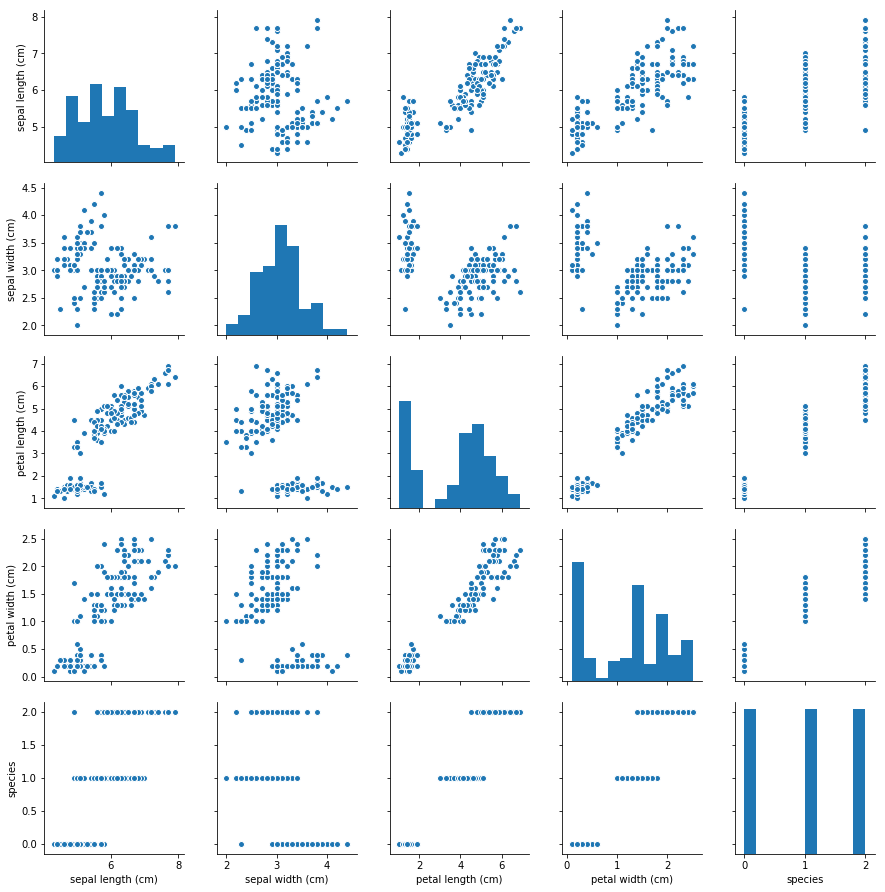

In [73]:
sns.pairplot(df)
plt.show()

**Break down of classes**  
0 : Setosa  
1 : Versicolour  
2 : Virginica  

----

**Modelling**
This data is extreamly neat and tidy so no cleaning necessary and we can get right into modelling.

In [74]:
# model the data, use a cross validation technique as well
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
# model.predict
y_pred = lr.predict(X_test)

In [77]:
# evaluated model preformance with a confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 13]])

With a multivariable confusion matrix, some of our labellings (True Pos., True Neg., False Pos., False Neg.) get a little warped.  We are no longer predicting one class from a null class we are classifiying into 3 distinguished classes.  

The **True** diagonal stays the same as these are properly classified observations.  


|     | Class 0 | Class 1  | Class 2 |
| --- | ------- |:--------:| -------:|
| **Pred Class 0**  | 15      | 0        | 0       |
| **Pred Class 1**    | 0       | 11       |   0     |
| **Pred Class 2**    | 0       | 1        |    11   |


It is better to stick with True and False labels with multi-class to avoid ...[_Confusion_](https://www.youtube.com/watch?v=bcYppAs6ZdI)

If you need to reffer to a False Positive or True Negative it is better to first select a specific class, such as `Class 2 ` and refer to classification or misclassification relative to said choosen class instead of the set of all classes as a whole. 

Example:
    _True Negatives relative to Class 2 are True Positives for Class 0 and Class 1._

Speaking of our Classes?  How are probabilities calculated with multi class?
- Are they Probability of `Class 0` vs. `Not Class 0`?
- Or Probability of `Class 0` vs. `Class 1` vs. `Class 2` ?

In [78]:
# use predict_proba to find out
lr.predict_proba(X_test)

array([[  2.47862027e-03,   5.55908040e-01,   4.41613339e-01],
       [  9.00038159e-04,   3.46020812e-01,   6.53079150e-01],
       [  3.80140531e-04,   3.07978171e-01,   6.91641688e-01],
       [  5.53489778e-02,   6.91297625e-01,   2.53353397e-01],
       [  7.65464501e-01,   2.34483814e-01,   5.16846252e-05],
       [  5.26706046e-03,   3.73046102e-01,   6.21686837e-01],
       [  8.17933754e-03,   7.55093180e-01,   2.36727482e-01],
       [  8.39738468e-01,   1.60178182e-01,   8.33497390e-05],
       [  7.77338876e-01,   2.22503023e-01,   1.58100622e-04],
       [  1.04227613e-02,   6.13762295e-01,   3.75814943e-01],
       [  2.72991353e-03,   3.19537101e-01,   6.77732985e-01],
       [  9.20546252e-01,   7.94493998e-02,   4.34817177e-06],
       [  3.54545009e-02,   5.60069903e-01,   4.04475596e-01],
       [  1.05115872e-03,   3.87940731e-01,   6.11008110e-01],
       [  2.52900930e-04,   3.85716441e-01,   6.14030658e-01],
       [  3.46301752e-04,   2.89691790e-01,   7.0996190

Looks like our probabilities of each class all add up to 1, so it is like `Class 0` vs. `Class 1` vs. `Class 2`.

What if we wanted to create a logistic regression that has `Class 0` vs. `Class 1` & `Class 2` or just `Class 0` vs. `Class 2`?  We will cover that in a bit, but first more evaluation metrics.

---

**Classification Reports/Matrix**

Classification reports are another means of evauliation classification models and return a few metrics that are based on True Positives, False Positives and False Negatives.  

In [ ]:
from sklearn.metrics import classification_report

print classification_report(y_test, y_pred)

**Precision**  
- "How many of the items selected are relevant."
- Of the items placed into a class, how many of the are True Positives.


$$\frac{True Positives}{True Positives + False Positives}$$

**Recall**  
- "How many of the relevant items are selected."
- Of the items that were suppose to be placed into a class, how many did we accurately place.


$$\frac{True Positives}{True Positives + False Negatives}$$

**F1-Score**

F1 exists on a range of 0 - 1 where 0 is just aweful and 1 is perfection.
F1 is considered a harmonic mean as it averages Precision and Recall.  With classification models you often times have to chooise what kind of error you are willing to increase in order to reduce the other and thus you may want to optimize Precision or Recall accordingly.  If you are uncertain which you should optimize, F1 score may be the metric of choice.

$$2*\frac{precision * recall}{precision + recall}$$

**Support**
Number of true observations in given class.  The count of possible true observations.  

---

## Intro to Ensembling

Earlier we talked about building models relative to class combinations.  Distinguishing One class from all other classes or just One specific class from another specific class.  These goals are possible with Logistic Regression.

Up until this point we have used one model, but there are also Machine Learning methods that involve combining several models to come to a more refined conclusion, commonly reffered to as Ensemble Methods.

### One Vs. Rest Classification.

One vs. Rest Classification is a method that builds an individual model for each class to try to distingush said specific class from the rest of the classes.  Since we are only focusing on one class, `Class 1` these classfiers will group `Class2`, `Class3`, `Class4` into a single class of `Not Class 1`.  Same all the way through for the rest of the classes.

1 - Class1 vs. Class2, Class3, Class4  
2 - Class2 vs. Class1, Class3, Class4  
3 - Class3 vs. Class1, Class2, Class4   
4 - Class4 vs. Class1, Class2, Class3  

### One Vs. One Classification.

We train a model for every set of classes.  As more classes are added this becomes more computationally expense.  

1 - Class1 vs. Class2  
2 - Class1 vs. Class3  
3 - Class1 vs. Class4  
4 - Class2 vs. Class3  
5 - Class2 vs. Class4  
6 - Class3 vs. Class4  


#### One Vs. Rest Classifier

In [ ]:
# import ensemble method
from sklearn.multiclass import OneVsRestClassifier 
# instantiate choose model
LR = LogisticRegression()
# place the model in the ensembler
OVC = OneVsRestClassifier(LR)
# use the ensemble like a normal sklearn model.
OVC.fit(x_train, y_train)


# you can use the train test split you created earlier or do a new TTS.

In [ ]:
# use the .predict and confusion matrix the same way
y_pred = OVC.predict(x_test)

confusion_matrix(y_test, y_pred)

#### One Vs. One Classifier

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
LR = LogisticRegression()
# OvO works the same as OvR

In [ ]:
# Make prediction and evaluate confusion matrix.

One Vs. One/Rest Classifiers are not restricted to fitting using Logistic Regression.  With SKLearn, any type of Classification model can be placed into the One Vs X classification ensemble.